In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.layers import *
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU
from keras.backend import expand_dims
from PIL import Image

from tools import *
from model import *
from os.path import getsize
from sys import getsizeof
%matplotlib inline

Using TensorFlow backend.


In [6]:
import pickle as pk

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.

In [120]:
import pickle as pk
for i in range(30):
    try:
        [encoder, decoder, autoencoder] = pk.load(open('model' + str(i+1) + '.pkl', 'rb'))
    except:
        encoder, decoder, autoencoder = create_model('CNN', encoding_dim=i+1)
        pass
    autoencoder.fit(x_train, x_train,
                    epochs=50,
                    batch_size=1024,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=0)
    pk.dump([encoder, decoder, autoencoder], open('model' + str(i+1) + '.pkl', 'wb'))

C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tangji\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
C:\Users\tan

In [6]:
import pickle as pk
pk.dump([encoder, decoder, autoencoder], open('model' + str(i+1) + '.pkl', 'wb'))

W1217 22:08:32.686443 10764 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1217 22:08:32.749519 10764 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1217 22:08:32.901425 10764 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1217 22:08:32.902425 10764 deprecation_wrapper.py:119] From C:\Users\tangji\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1217 22:08:32.903431 10764 deprecation_wrapper.py:119] From C:

In [68]:
np.mean(np.linalg.norm(np.array(y_test)-x_test, axis=(1,2), ord=2))

1418.3439305923812

In [65]:
np.sum((y_test-x_test)**2).shape

()

In [ ]:
y_test

In [59]:
np.linalg.norm(np.array(y_test)[1]-x_test[1], ord=2)

1589.2249419862314

In [4]:
file_size = []
mse_loss = []
for i in range(1, 96):
    y_test = []
    y_size = []
    for img in x_test:
        result = Image.fromarray(img)
        name = 'imgs/temp.jpg'
        result.save(name, 'JPEG', quality=i)
        y_size.append(getsize(name)/912)
        I = np.asarray(Image.open(name))
        y_test.append(I)
    mse_loss.append(np.mean(np.linalg.norm(np.array(y_test)-x_test, axis=(1,2), ord=2)))
    file_size.append(np.mean(y_size))

KeyboardInterrupt: 

Text(0, 0.5, 'MSE')

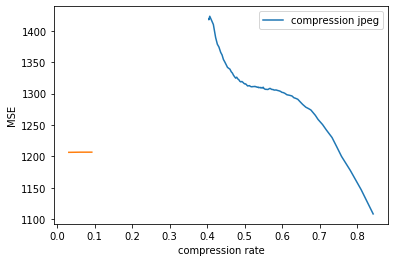

In [16]:
plt.plot(file_size, mse_loss)
plt.plot(file_size_auto, mse_loss_auto)
plt.legend(['compression jpeg'])
plt.xlabel("compression rate")
plt.ylabel("MSE")

# plt.plot(getsize('out_encode.npy')/912, np.linalg.norm(a[0]-x_train[0], ord=2), 'or')

In [72]:
pk.dump([file_size, mse_loss], open('log_jpg', 'wb'))

In [7]:
[file_size, mse_loss] = pk.load(open('log_jpg', 'rb'))

In [116]:
file_size_auto = np.array(file_size_auto)/912

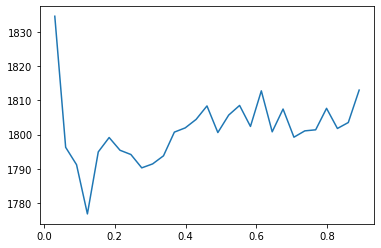

In [117]:
plt.plot(file_size_auto, mse_loss_auto)

In [ ]:
mse_loss_auto = np.array(mse_loss_auto)

In [17]:
mse_loss_auto

[1206.4716, 1206.7261, 1206.7458]

In [13]:
file_size_auto = []
mse_loss_auto = []
for i in range(1, 30):
    [encoder, decoder, autoencoder] = pk.load(open('model' + str(i+1) + '.pkl', 'rb'))
    y_test = autoencoder.predict(x_test)
    file_size_auto.append(28 * i / 912)
    mse_loss_auto.append(np.mean(np.linalg.norm(np.array(y_test)-x_test, axis=(1,2), ord=2)))

/Users/jojo/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


/Users/jojo/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Users/jojo/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Users/jojo/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


KeyboardInterrupt: 